In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [5]:
# read csv
train = pd.read_csv('data/train_test/train.csv', header = 0)
test = pd.read_csv('data/train_test/test.csv', header = 0)

In [6]:
# split X and y
y_train = train['M']
X_train = train.drop(columns = ['M'])

y_test = test['M']
X_test = test.drop(columns = ['M'])

In [4]:
# data normalization
from sklearn.preprocessing import StandardScaler

# list for cols to scale
cols_to_scale = ['Fe','S1','S2','S3','S4','Ni','Co','Cr','Mn','Se','S','Te']

#create and fit scaler using train data
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

#scale trained data
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

# scale test data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


# Machine Learning Models

## Import libraries

In [8]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [9]:
# define 10-Fold CV object
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

## 1. Linear Regression

In [10]:
# create lr model
lr_clf = LinearRegression()

# calculate cross validation scores
# MSE
score = cross_val_score(lr_clf, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())
print("---------------------")

# R2 Error
score = cross_val_score(lr_clf, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())
print("---------------------")

# MAE
score = cross_val_score(lr_clf, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())

Scores:  [-6.62049115 -7.32942984 -6.47729331 -7.23570509 -7.03503016 -7.42770107
 -6.75655087 -7.83059039 -6.24506202 -7.06546415] 

Negative Mean Square Error: -7.002331806566119
---------------------
Scores:  [0.69703931 0.66940064 0.66956488 0.71029315 0.68987915 0.67448625
 0.71657408 0.69660077 0.72457546 0.69525168] 

R2 Mean Score: 0.6943665363180347
---------------------
Scores:  [-2.09066843 -2.19953295 -2.09042594 -2.20123383 -2.1305333  -2.26679365
 -2.15809787 -2.26123849 -2.06059702 -2.21403773] 

Mean Absolute Error: -2.1673159207975177


## 2. SVR

In [ ]:
from sklearn.svm import SVR
import numpy as np
n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
X = np.random.randn(n_samples, n_features)
parameters = {'kernel': ('rbf','poly'), 'C':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,50,100],'gamma': [1,0.1,0.01,0.001,0.0001,0.00001]}
svr = SVR()
clf = GridSearchCV(svr, parameters, verbose=2)
clf.fit(X_train,y_train)
clf.best_params_

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.3s


In [128]:
from sklearn.metrics import r2_score
for C in [12]:
    summ = 0
    print("C = "+str(C))
    for train, val in kfold.split(X_train):
        X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
        X_val, y_val = X_train.iloc[val], y_train.iloc[val]

        svr = SVR(C=12)
        svr.fit(X_train_small,y_train_small)

        y_pred = svr.predict(X_val)
        # res = mean_squared_error(y_pred, y_val)
        
        res = r2_score(y_pred, y_val)
        summ = summ + res
        print(res)
    print("Average = "+str(summ/10))
    print("-----------------------")

C = 12
0.9304424804919947
0.9326469856880765
0.9140209215767324
0.9321160768378444
0.9330895133314858
0.9194862346986074
0.9243306176577657
0.927105287087916
0.9200040665592593
0.9223854689332719
Average = 0.9255627652862953
-----------------------


In [86]:
from sklearn.metrics import r2_score
for C in [12]:
    summ = 0
    print("C = "+str(C))
    for train, val in kfold.split(X_train):
        X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
        X_val, y_val = X_train.iloc[val], y_train.iloc[val]

        svr = SVR(C=C)
        svr.fit(X_train_small,y_train_small)

        y_pred = svr.predict(X_val)
        # res = mean_squared_error(y_pred, y_val)
        
        res = mean_absolute_error(y_pred, y_val)
        summ = summ + res
        print(res)
    print("Average = "+str(summ/10))
    print("-----------------------")

C = 12
0.5819318421571072
0.5900867878568465
0.5731176197146316
0.6082833203225346
0.5332364426323675
0.5897179863776869
0.554367972827672
0.5926486914666824
0.512713137013056
0.6064516069055166
Average = 0.5742555407274101
-----------------------


## 3. Decision Tree

In [12]:
dt_clf = DecisionTreeRegressor()

# MSE
score = cross_val_score(dt_clf, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())

print("---------------------")
# R2 Error
score = cross_val_score(dt_clf, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())
print("---------------------")


# MAE
score = cross_val_score(dt_clf, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())

Scores:  [-1.9652855  -1.72782023 -1.74754009 -1.85159717 -1.82947784 -1.20042784
 -1.22011717 -1.81878489 -1.42761181 -2.02438087] 

Negative Mean Square Error: -1.681304341783551
---------------------
Scores:  [0.91009005 0.92195626 0.90974949 0.93038885 0.91776974 0.9519165
 0.95075322 0.92687079 0.93803102 0.90493395] 

R2 Mean Score: 0.9262459853980198
---------------------
Scores:  [-0.56056188 -0.51898084 -0.56210666 -0.55519795 -0.5719016  -0.49539081
 -0.47293654 -0.62128408 -0.53511596 -0.62468959] 

Mean Absolute Error: -0.5518165919070235


## 4. Random Forest

### Grid Search

In [ ]:
import numpy as np

from sklearn import ensemble

# Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [20,50,100,200,300,400,500,600, 700,800,900, 1000], 'min_samples_split': [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,20]}

# clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(X_train, y_train)
print(clf.best_estimator_)

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=500, min_samples_split = 13)

# MSE
score = cross_val_score(rf_clf, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ", score,"\n\nNegative Mean Square Error:",score.mean())


print("---------------------")

# R2 Error
score = cross_val_score(rf_clf, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())

# MAE
print("---------------------")
score = cross_val_score(rf_clf, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())


Scores:  [-1.43568798 -1.54259801 -1.27454668 -1.51218718 -1.51451063 -1.19766991
 -1.18263106 -1.79022917 -1.29151298 -1.66020095] 

Negative Mean Square Error: -1.4401774556059639
---------------------
Scores:  [0.93401298 0.93013136 0.93616671 0.93901412 0.93393037 0.94789675
 0.9498967  0.93030534 0.94332542 0.9279828 ] 

R2 Mean Score: 0.9372662558735592
---------------------
Scores:  [-0.54921349 -0.53833581 -0.52044547 -0.55264502 -0.57659403 -0.54073683
 -0.4977806  -0.62730201 -0.537669   -0.58610792] 

Mean Absolute Error: -0.5526830172369894


'\nScores:  [-1.44315052 -1.55489068 -1.24913604 -1.53390967 -1.49640879 -1.19264086\n -1.17735006 -1.81151611 -1.28081362 -1.65060402] \n\nNegative Mean Square Error: -1.4390420376834365\n---------------------\nScores:  [0.93470327 0.93015196 0.93565524 0.9378796  0.93383371 0.94834341\n 0.95022533 0.92991423 0.94322363 0.92906787] \n\nR2 Mean Score: 0.9372998255258349\n'

## 5. KNN

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn_clf = KNeighborsRegressor()

# MSE
score = cross_val_score(knn_clf, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())

print("---------------------")
# R2 Error
score = cross_val_score(knn_clf, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())

# MAE
print("---------------------")
score = cross_val_score(knn_clf, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())

Scores:  [-1.61040429 -2.12101036 -1.68956957 -1.82041458 -1.87780658 -1.46860566
 -1.2890267  -1.81565934 -1.480206   -1.89420304] 

Negative Mean Square Error: -1.7066906122529848
---------------------
Scores:  [0.92630619 0.90433026 0.91380765 0.92711331 0.91722182 0.9356394
 0.9459275  0.92965158 0.93471881 0.91829904] 

R2 Mean Score: 0.9253015570848451
---------------------
Scores:  [-0.60562595 -0.65155892 -0.60881405 -0.60791568 -0.66379297 -0.59959512
 -0.52706396 -0.68196314 -0.57832249 -0.62643957] 

Mean Absolute Error: -0.6151091849410386


In [62]:
err

1.65008699712098

### XGBoost

In [10]:
from sklearn import ensemble

reg = ensemble.GradientBoostingRegressor()

# MSE
score = cross_val_score(reg, X_train, y_train, cv= 10, scoring='neg_mean_squared_error')
print("Scores: ",score,"\n\nNegative Mean Square Error:",score.mean())

print("---------------------")
# R2 Error
score = cross_val_score(reg, X_train, y_train, cv= 10)
print("Scores: ",score,"\n\nR2 Mean Score:",score.mean())


# MAE
print("---------------------")
score = cross_val_score(reg, X_train, y_train, cv= 10, scoring='neg_mean_absolute_error')
print("Scores: ",score,"\n\nMean Absolute Error:",score.mean())



Scores:  [-1.52222125 -1.82667785 -1.23848509 -1.55040293 -1.54734647 -1.47612781
 -1.27367941 -1.80597346 -1.80597028 -1.77201161] 

Negative Mean Square Error: -1.5818896153418627
---------------------
Scores:  [0.93034154 0.91760634 0.93681945 0.93792418 0.93178929 0.93530974
 0.94657129 0.93002686 0.92035171 0.92356941] 

R2 Mean Score: 0.9310309822749037
---------------------
Scores:  [-0.67384896 -0.6963745  -0.63253687 -0.67211028 -0.69701847 -0.67943528
 -0.63676067 -0.7305399  -0.76143233 -0.70871043] 

Mean Absolute Error: -0.6888767697062921


# Deep Learning Models

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

2022-08-20 14:16:21.448938: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-20 14:16:21.452271: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-20 14:16:21.452281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [20]:
sum_mse, sum_r2, sum_mae = 0, 0, 0
for train, val in kfold.split(X_train):
    X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
    X_val, y_val = X_train.iloc[val], y_train.iloc[val]

    # define model
    model = Sequential()
    model.add(Dense(254, activation= 'relu', input_shape = (12,))) #input shape = X_train[0].shape
    model.add(Dense(64, activation= 'relu'))
    # model.add(Dense(4, activation= 'relu'))
    model.add(Dense(1))

    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.01), loss='mse')

    #early stopping
    callback = tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss', mode = 'min')

    model.fit(X_train_small,y_train_small, epochs = 500,  batch_size=256, verbose=1, validation_data = (X_val,y_val), callbacks = [callback])
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred, y_val)
    r2 = r2_score(y_pred, y_val)
    mae = mean_absolute_error(y_pred, y_val)
    sum_mse = sum_mse + mse
    sum_r2 = sum_r2 + r2
    sum_mae = sum_mae + mae
    print(str(mse), str(r2), str(mae))
    
print("-----------------------")  
print("Average = ", str(sum_mse/10), str(sum_r2/10), str(sum_mae/10))
print("-----------------------")

Epoch 1/500
13/13 [==============================] - 0s 10ms/step - loss: 8.8421 - val_loss: 2.3529
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 2.1406 - val_loss: 2.1760
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 1.9351 - val_loss: 1.8428
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7964 - val_loss: 1.8418
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7745 - val_loss: 1.9075
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6887 - val_loss: 1.8922
Epoch 7/500
13/13 [==============================] - 0s 6ms/step - loss: 1.7341 - val_loss: 1.7550
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6443 - val_loss: 1.7157
Epoch 9/500
13/13 [==============================] - 0s 6ms/step - loss: 1.6093 - val_loss: 1.6829
Epoch 10/500
13/13 [==============================] - 0s 7ms/step - loss: 1.6021 - val_loss: 2.0114
Epoch 11

In [67]:
model.save('one_point_four_two_XXX.h5')

### Load model

In [83]:
sum_mse, sum_r2, sum_mae = 0, 0, 0
for train, val in kfold.split(X_train):
    X_train_small, y_train_small = X_train.iloc[train], y_train.iloc[train]
    X_val, y_val = X_train.iloc[val], y_train.iloc[val]

    model = load_model("models/one_point_four_two.h5")
    
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_pred, y_val)
    r2 = r2_score(y_pred, y_val)
    mae = mean_absolute_error(y_pred, y_val)
    sum_mse = sum_mse + mse
    sum_r2 = sum_r2 + r2
    sum_mae = sum_mae + mae
    print(str(mse), str(r2), str(mae))
    
print("-----------------------")  
print("Average = ", str(sum_mse/10), str(sum_r2/10), str(sum_mae/10))
print("-----------------------")

12/12 [==============================] - 0s 1ms/step
0.9127845707115693 0.959967302052909 0.4805081704068829
12/12 [==============================] - 0s 768us/step
1.2124618053089535 0.9477915323466952 0.5377098193688168
12/12 [==============================] - 0s 778us/step
1.0939867355023547 0.950277931788403 0.49262711697365774
12/12 [==============================] - 0s 1ms/step
1.0305871171491616 0.9553416902742884 0.5401036481198426
12/12 [==============================] - 0s 788us/step
0.7580847475589217 0.9611940421428133 0.4462597678136986
12/12 [==============================] - 0s 731us/step
1.3456361110238988 0.9396055344087971 0.5609039416311556
12/12 [==============================] - 0s 935us/step
0.8532051845187795 0.9519396640413331 0.4652795625262791
12/12 [==============================] - 0s 946us/step
1.2358109094791065 0.9484878275087737 0.5240401169508292
12/12 [==============================] - 0s 1ms/step
1.175547286252387 0.9403103656894165 0.45728634967608506

In [18]:
model = load_model("models/one_point_four_two.h5")

2022-08-06 17:28:23.543862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-06 17:28:23.543911: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-06 17:28:23.543943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-06 17:28:23.543971: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-08-06 17:28:23.543999: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

In [19]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 0s 2ms/step - loss: 1.3204


1.3204246759414673

In [20]:
y_pred = model.predict(X_test) 

21/21 [==============================] - 0s 966us/step


In [21]:
err = mean_squared_error(y_pred, y_test)

In [22]:
err

1.320424741473591

### Train on full data, test on independent test set

In [ ]:
# split train test sets
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state=100)

# define model
model = Sequential()
model.add(Dense(256, activation= 'relu', input_shape = (12,))) #input shape = X_train[0].shape
model.add(Dense(64, activation= 'relu'))
# model.add(Dense(4, activation= 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mse')

# early stopping
callback = tf.keras.callbacks.EarlyStopping(patience=9, monitor='val_loss', mode = 'min')

history = model.fit(X_train_1,y_train_1, epochs = 200,  batch_size=64, verbose=1, validation_data=(X_val, y_val) , callbacks = [callback] )

y_pred = model.predict(X_test)
res = mean_squared_error(y_pred, y_test)
print("MSE = ", str(res))

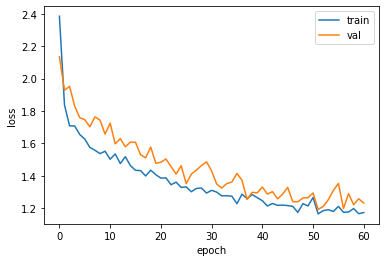

In [14]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [87]:
y_pred = model.predict(X_test)
res = r2_score(y_pred, y_test)
print("R2 = ", str(res))

21/21 [==============================] - 0s 978us/step
R2 =  0.9385321774025942


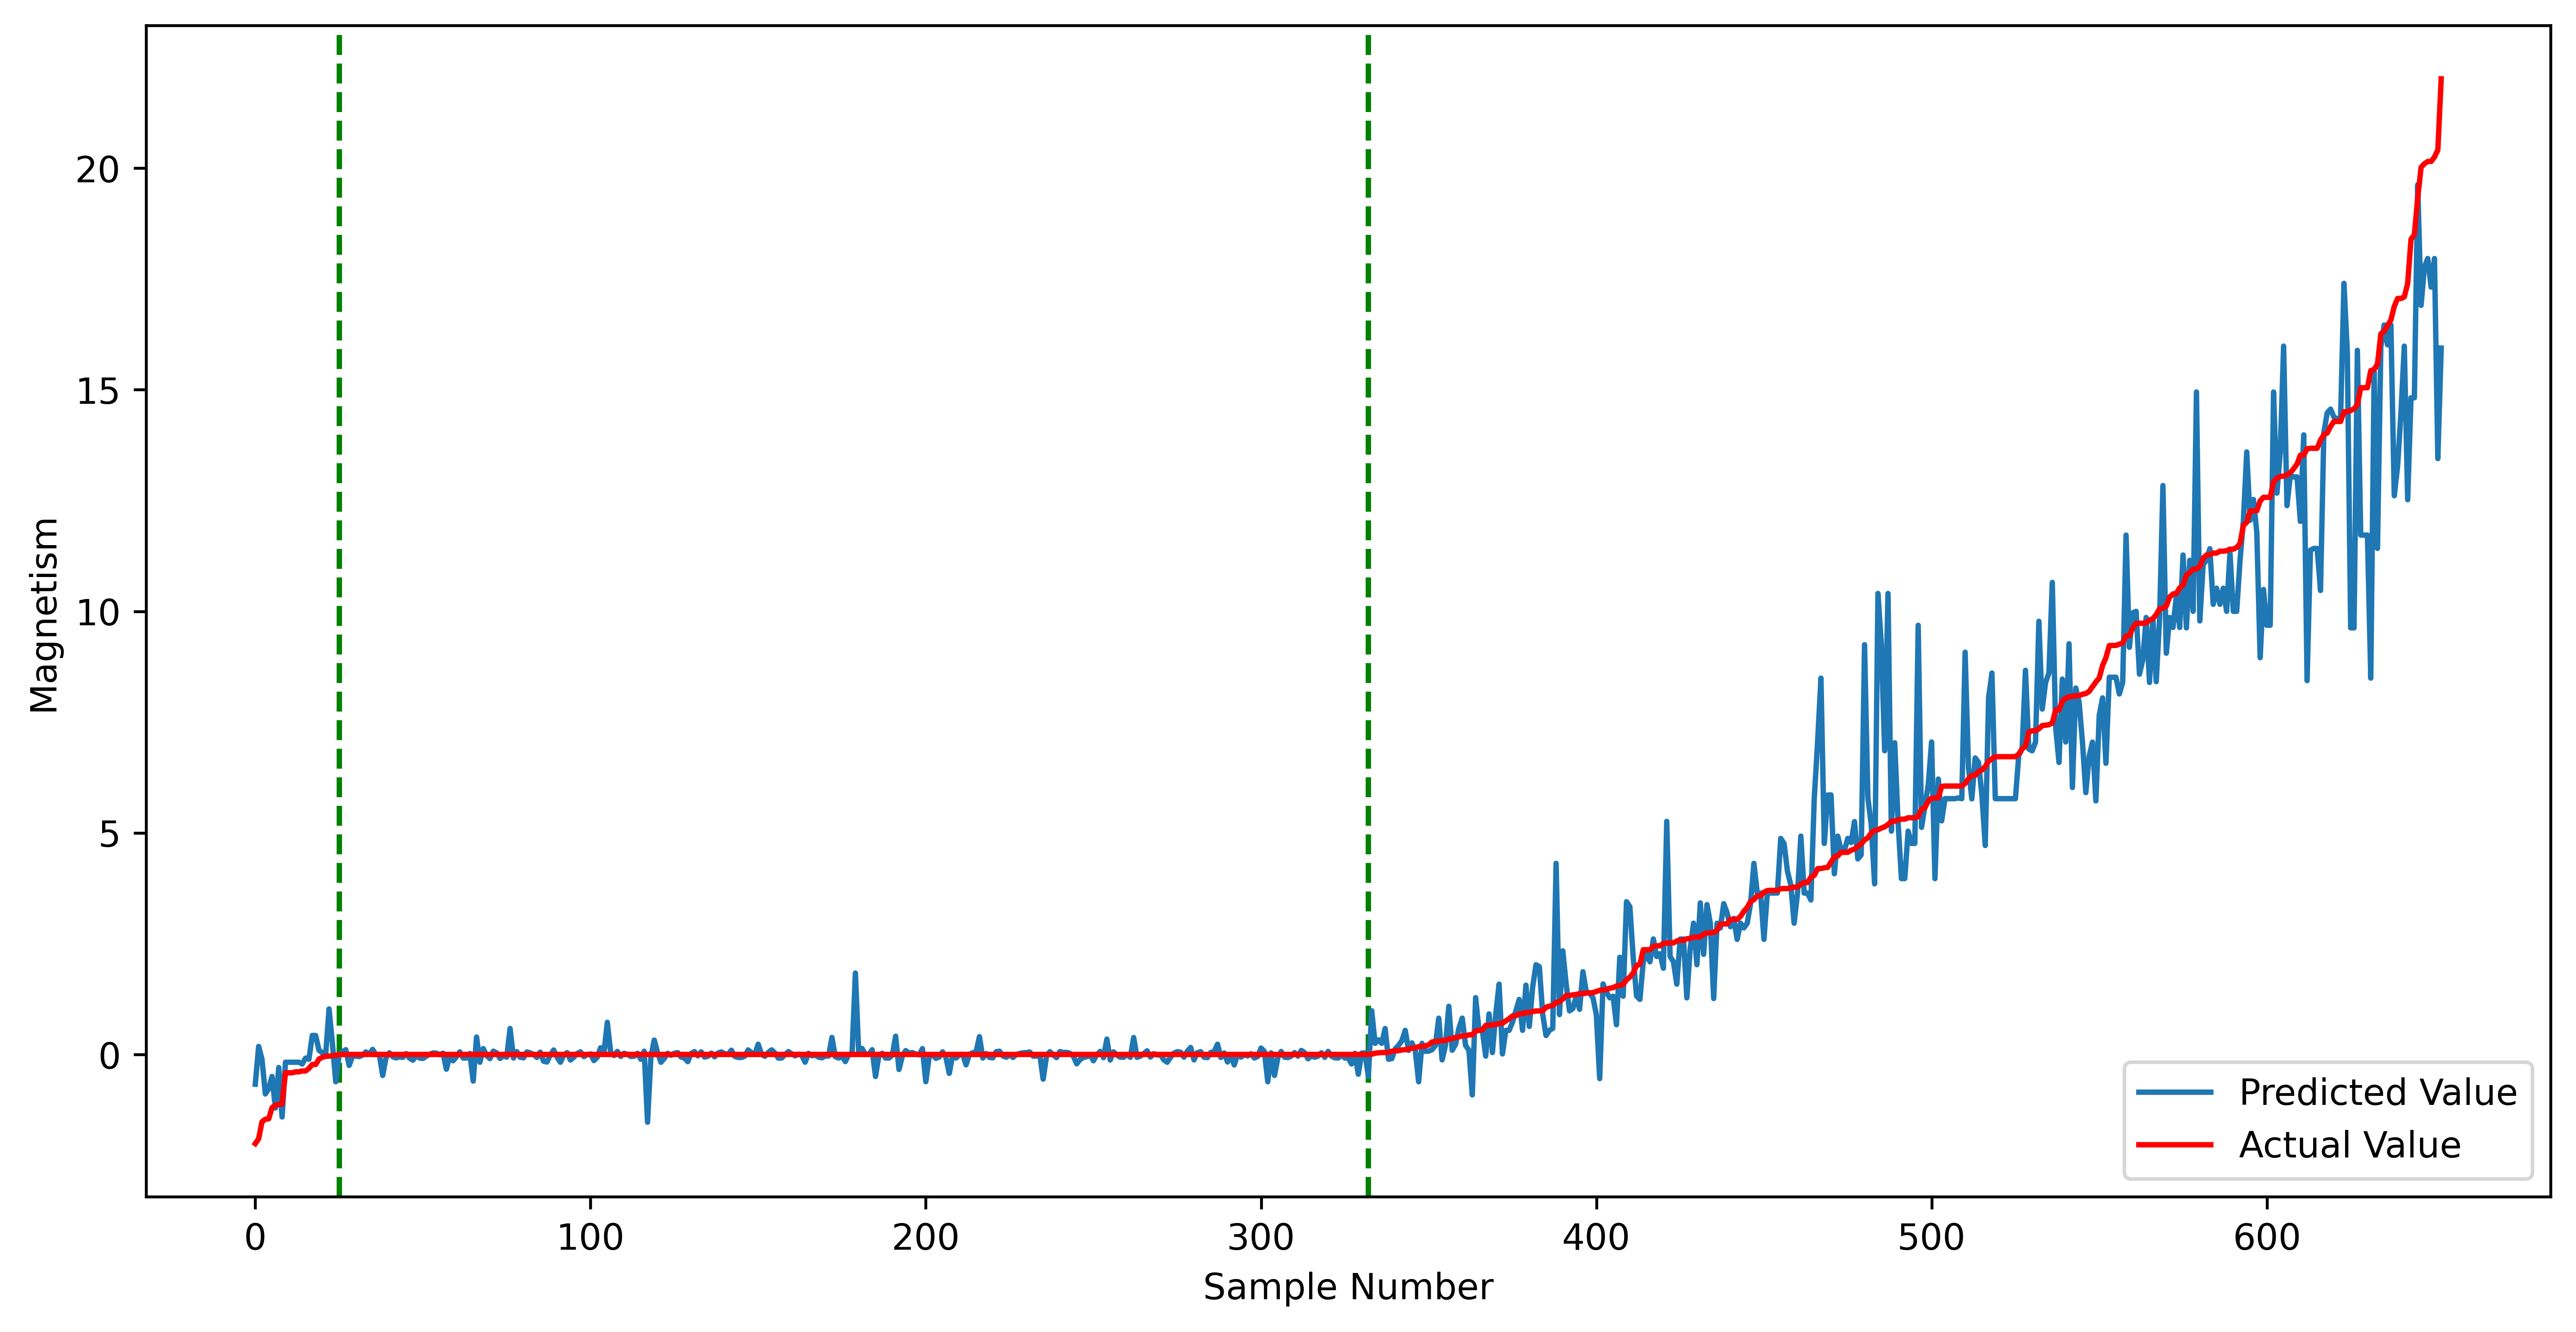

In [116]:
y_test_sorted = [-2.012,-1.903,-1.521,-1.462,-1.452,-1.2,-1.146,-1.129,-1.122,-0.414,-0.414,-0.414,-0.393,-0.393,-0.374,-0.374,-0.315,-0.227,-0.227,-0.104,-0.065,-0.041,-0.039,-0.027,-0.02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002,0.005,0.028,0.037,0.043,0.043,0.045,0.073,0.079,0.086,0.101,0.107,0.122,0.141,0.149,0.177,0.181,0.19,0.218,0.28,0.293,0.3,0.314,0.317,0.347,0.357,0.383,0.398,0.417,0.418,0.442,0.444,0.529,0.542,0.553,0.654,0.655,0.67,0.674,0.699,0.704,0.756,0.808,0.868,0.874,0.913,0.922,0.946,0.95,0.967,0.981,0.983,0.984,1.066,1.089,1.102,1.177,1.187,1.253,1.33,1.33,1.345,1.352,1.372,1.372,1.385,1.388,1.395,1.42,1.447,1.456,1.464,1.494,1.508,1.543,1.558,1.581,1.682,1.746,1.839,2.007,2.033,2.363,2.363,2.363,2.441,2.451,2.451,2.504,2.513,2.518,2.518,2.559,2.576,2.576,2.61,2.62,2.646,2.651,2.652,2.714,2.741,2.743,2.752,2.799,2.939,2.945,2.945,3.049,3.049,3.049,3.113,3.229,3.318,3.453,3.493,3.579,3.581,3.661,3.698,3.702,3.702,3.702,3.738,3.743,3.743,3.759,3.775,3.775,3.84,3.88,3.88,3.999,4.041,4.192,4.196,4.212,4.221,4.339,4.46,4.478,4.56,4.56,4.56,4.608,4.636,4.692,4.751,4.841,4.89,4.997,5.053,5.072,5.108,5.136,5.187,5.261,5.265,5.29,5.31,5.31,5.341,5.341,5.341,5.368,5.537,5.566,5.717,5.783,5.788,5.79,6.048,6.056,6.056,6.056,6.056,6.056,6.056,6.116,6.22,6.298,6.298,6.385,6.417,6.496,6.62,6.671,6.719,6.719,6.719,6.719,6.719,6.719,6.719,6.778,6.896,6.954,7.275,7.305,7.305,7.348,7.422,7.429,7.442,7.479,7.775,7.775,7.976,8.039,8.07,8.082,8.095,8.095,8.129,8.143,8.192,8.299,8.405,8.494,8.776,8.953,9.226,9.23,9.23,9.259,9.283,9.447,9.448,9.621,9.727,9.73,9.73,9.737,9.802,9.833,9.927,10.059,10.071,10.121,10.322,10.39,10.402,10.528,10.589,10.815,10.872,10.95,10.954,11.011,11.2,11.27,11.277,11.314,11.314,11.356,11.356,11.366,11.402,11.403,11.441,11.531,11.939,12.008,12.264,12.264,12.269,12.492,12.571,12.571,12.571,12.923,13.004,13.043,13.05,13.079,13.127,13.218,13.322,13.524,13.524,13.666,13.679,13.679,13.679,13.862,13.986,14.022,14.171,14.284,14.284,14.284,14.503,14.503,14.531,14.57,14.662,15.045,15.045,15.046,15.433,15.458,15.576,16.262,16.319,16.45,16.574,16.88,17.059,17.059,17.096,17.397,18.396,18.497,19.33,20.017,20.1,20.151,20.151,20.252,20.412,22.016]
y_pred_sorted = [-0.6710214,0.18055364,-0.10888207,-0.8918286,-0.77284515,-0.4972364,-1.2100708,-0.29535773,-1.4110535,-0.1760186,-0.1760186,-0.1760186,-0.1760186,-0.1760186,-0.21550004,-0.08287385,-0.10888207,0.42766073,0.42766073,0.094343215,0.035685483,0.0050271787,1.0267568,0.25094253,-0.6168552,-0.0068638213,0.062444773,0.106876045,-0.2479715,-0.037001383,-0.038950104,-0.048057545,-0.013592359,0.05659737,0.0067220367,0.113190025,-0.006313186,0.000904087,-0.47437248,-0.07224089,0.037414823,-0.05227315,-0.07790807,-0.056712206,-0.06626186,0.018707704,-0.08287385,-0.1293073,-0.030005168,-0.08127707,-0.09066138,-0.038422134,0.0020679273,0.033589676,0.029153418,-0.005221512,0.028363843,-0.33315882,-0.037001383,-0.14297348,-0.05345061,0.05893003,-0.08127707,-0.08127707,0.022151534,-0.60140777,0.3920535,-0.1760186,0.13139793,-0.025445607,-0.09462626,0.07324873,0.034222554,-0.09104043,-0.026669618,-0.06252666,0.58613217,-0.08127707,0.063444704,-0.06353852,-0.07681696,0.05615766,0.034788016,-0.00019457564,-0.06851266,0.052185662,-0.15326792,-0.17048603,-0.010001268,0.09909204,-0.05862653,-0.1760186,-0.02007199,0.04104844,-0.12531854,-0.06353852,0.018707704,0.05893341,-0.04988956,-0.006313186,0.012933556,-0.13865566,-0.06252666,0.15060642,0.034271065,0.7243438,0.04148214,-0.025165882,0.06875305,-0.04493135,0.026758377,0.0027169771,-0.045295905,-0.041646656,0.025177617,-0.109523356,0.07324873,-1.5291855,-0.056712206,0.3242156,0.03913756,-0.1760186,-0.09066138,0.025638524,-0.02007199,0.025177617,0.04148214,-0.059554692,-0.08127707,-0.1628336,0.022151534,0.063444704,-0.032622155,0.05852612,-0.059554692,-0.04047754,0.0300189,-0.05352978,0.029633801,0.05659737,0.01988836,-0.0018087067,0.09496409,-0.043340433,-0.06851266,-0.06851266,-0.038422134,0.10175426,0.04148214,-0.0018087067,0.23039316,0.0031864606,-0.042974006,0.043304324,0.1020537,0.035685483,-0.08335745,-0.08127707,-0.0090598725,0.064715475,0.015014138,-0.031656113,0.0056073405,-0.018875849,-0.1760186,0.025638524,-0.029116523,-0.016118687,-0.059748184,-0.07681696,-0.03627829,-0.03627829,0.38340104,-0.05251475,-0.08127707,-0.040813323,-0.16177005,-0.0018087067,0.021661568,1.8355702,0.011451561,0.13309418,-0.00056185946,0.0003171526,0.10610816,-0.4972364,-0.031648714,0.026072014,-0.08127707,-0.08127707,-0.017942991,0.41130432,-0.33963498,-0.04047754,0.08655834,0.030792747,0.04148214,0.008997086,-0.010001268,0.13116345,-0.6140658,-0.053832974,-0.0068638213,-0.08824827,-0.05948014,0.05893341,-0.065954074,-0.42715433,-0.015316326,-0.08127707,-0.011117302,0.0046991445,-0.23481804,0.0046991445,0.038193885,0.058561,0.4007924,-0.08127707,0.01988836,-0.06851266,-0.07660405,0.062444773,0.07149549,-0.034789007,-0.06347802,-0.009226147,-0.06851266,-0.0044735633,0.022732574,0.036996756,0.04104844,0.05515514,-0.037001383,-0.038422134,-0.0024683475,-0.55773276,-0.037001383,0.062324453,-0.010001268,-0.07271233,0.06507708,0.04402115,0.04615872,0.026072014,-0.037001383,-0.2125164,-0.114674866,-0.06851266,-0.05227315,-0.010001268,-0.14297348,-0.010001268,0.06875305,-0.07271233,0.3459379,-0.12538692,0.058769677,-0.015785884,-0.06281547,-0.06347802,0.0003171526,-0.06532748,0.3805478,-0.06532748,-0.038579684,0.017894585,0.081437856,-0.059900846,0.016796064,-0.013592359,-0.0024683475,-0.1233277,-0.1760186,-0.06353852,0.029615615,0.061691474,0.050277863,-0.062550515,0.07268478,0.15682861,-0.1233277,0.04104844,0.062324453,-0.06307936,-0.07271233,0.04543743,0.058534015,0.23039316,-0.06851266,0.033589676,-0.17048603,-0.026355457,-0.2374781,-0.00056185946,-0.059900846,-0.010001268,-0.034676712,0.015014138,-0.08127707,-0.046438213,0.14408392,0.06678864,-0.6168552,0.034788016,-0.47437248,-0.07261641,0.06678864,-0.06252666,-0.07157907,-0.037001383,0.04104844,-0.038422134,0.08973929,0.039421957,-0.09788504,-0.037001383,-0.06307936,-0.038422134,0.038193885,-0.065954074,0.06896523,-0.038422134,-0.07650168,-0.08127707,-0.010001268,-0.08127707,-0.08127707,-0.21550004,0.025699018,-0.4457016,0.029615615,0.034222554,-0.49923888,0.98542774,0.25094253,0.32933804,0.25094253,0.58397603,-0.108523965,-0.0937648,0.12557007,0.20289361,0.30918142,0.54355234,0.090377,0.26034433,0.090377,-0.6168552,0.25094253,0.07106003,0.07454595,0.10805547,0.20289361,0.81822693,-0.1224103,0.20289361,1.0862354,0.094343215,0.22539194,0.58692336,0.81921875,0.20289361,0.09211615,-0.91402453,1.2813369,0.54355234,0.54355234,-0.038255353,0.91425484,0.04249667,0.91425484,1.5855592,0.011791851,0.54355234,0.54355234,0.73060906,0.9834049,1.2417709,0.54355234,1.563553,0.63171273,1.5162814,2.024402,1.9810404,0.90927756,0.42682812,0.54355234,0.58777297,4.3119307,0.8990877,2.3380167,1.5855592,0.9834049,1.0351263,1.3138196,1.0183067,1.8661258,1.4131075,1.3908697,1.2767065,0.8990877,-0.54575956,1.591501,1.4131075,1.2767065,1.3138196,0.6692487,2.191847,1.3138196,3.4467268,3.3338044,2.1946433,1.319069,1.2417709,2.090556,2.2713888,2.090556,2.6050828,2.211139,2.2713888,1.9451619,5.259033,2.211139,2.090556,1.5855592,2.6021879,2.6050828,1.2767065,2.3965104,2.9613466,2.024402,3.4200413,2.2580402,3.3814394,2.9613466,1.2615913,2.9613466,2.8547194,3.4022477,3.1948376,2.882547,3.0691814,2.5958445,2.9613466,2.8547194,2.9613466,3.4022477,4.3119307,3.6412141,3.6412141,2.5958445,3.6412141,3.6412141,3.6412141,3.6412141,4.8743563,4.758551,4.1367903,3.8266149,2.9613466,3.6339972,4.926241,3.6412141,3.6412141,3.4846423,5.7712693,7.052849,8.491524,4.7615676,5.853732,5.855711,4.0772166,4.926241,4.610702,4.610702,4.8743563,4.7809014,5.254897,4.411457,4.5025764,9.245543,5.788354,5.181571,3.8488052,10.402172,9.260771,6.852272,10.402172,5.038394,7.0328674,5.254897,3.9676447,3.9676447,5.038394,4.7615676,4.7615676,9.6841755,5.123824,5.6019287,6.0795283,7.050438,3.9676447,6.214016,5.2705693,5.7712693,5.7712693,5.7712693,5.7712693,5.788354,5.7712693,9.077114,6.480465,5.7673526,6.6905317,6.589022,5.855711,4.7155657,8.047953,8.606512,5.7712693,5.7712693,5.7712693,5.7712693,5.7712693,5.7712693,5.7712693,6.750348,6.891265,8.668364,6.891265,6.852272,7.047925,9.77401,7.793991,8.394357,8.606512,10.651535,7.383441,6.589022,8.470661,7.050438,9.2675495,6.022805,8.267826,7.9485226,7.047925,5.908815,6.729597,7.047925,5.721452,7.6525536,8.046146,6.570393,8.511432,8.511432,8.511432,8.134607,8.394357,11.719564,9.187983,9.963909,9.99873,8.580638,8.907545,9.859468,8.394357,9.825077,8.411905,9.830479,12.837991,9.054149,9.859468,9.635376,10.3408985,9.635376,11.269491,9.625971,11.149483,9.99873,14.94861,9.782358,11.058136,11.149483,11.411869,10.157886,10.521231,10.157886,10.521231,9.99873,11.316813,9.99873,9.99873,11.149483,12.04079,13.595799,12.05253,12.522747,11.783886,8.952274,10.493162,9.6841755,9.6841755,14.94861,12.666269,13.587711,15.983764,12.384142,13.067726,13.032513,13.032513,12.0291605,13.981127,8.434508,11.379512,11.418198,11.418198,10.469358,14.028896,14.4783325,14.562715,14.383291,14.336572,14.383291,17.39995,15.858109,9.625971,9.625971,15.888697,11.719564,11.719564,11.719564,8.491524,15.404039,11.418198,15.974525,16.460918,16.0129,16.460918,12.606838,13.274829,14.477291,15.983764,12.518007,14.817527,14.817527,19.625555,16.903442,17.77155,17.960646,17.315514,17.960646,13.44607,15.939457]

fig = plt.figure(figsize=(12, 6), dpi=600)
ax = fig.add_subplot(111)

ax.axvline(x=25, color = 'green', linestyle = '--')
ax.axvline(x=332, color = 'green', linestyle = '--')

ax.set_xlabel('Sample Number')
ax.set_ylabel('Magnetism')

ax.plot(y_pred_sorted, label = "Predicted Value")
ax.plot(y_test_sorted,'r', label = "Actual Value")

ax.legend()

fig.savefig("output_comparison.png", dpi = 600)